In [2]:
import pandas as pd
import numpy as np

## titanic survivals

In [8]:
df = pd.read_csv("titanic_train.csv")

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


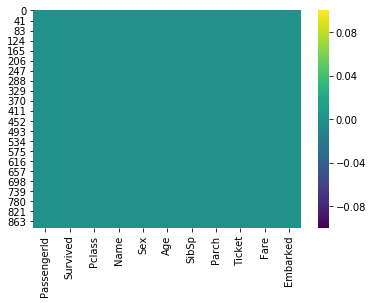

In [59]:
sns.heatmap(df.isnull(),cmap='viridis')

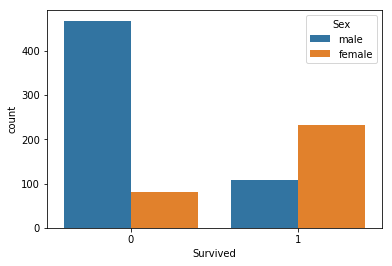

In [19]:
sns.countplot(df.Survived,hue=df.Sex)

In [47]:
def compute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 28
        else:
            return 25
    else:
        return age

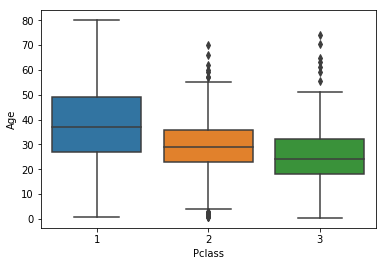

In [48]:
sns.boxplot(x='Pclass',y="Age",data=df)

In [70]:
"""
pclass 1 : 38
pclass 2 : 28
pclass 3 : 25
"""
df.Age = df[['Age','Pclass']].apply(compute_age,axis=1)
#df = pd.get_dummies(df,columns='Sex',drop_first=True)
df = pd.get_dummies(df,columns=['Embarked'],drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,1


In [53]:
df = df.drop('Cabin',axis=1)

In [58]:
df.dropna(inplace=True)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [71]:
x = df.drop(['PassengerId','Survived','Name','Ticket'],axis=1)
y = df.Survived
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [73]:
model = LogisticRegression()

In [74]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
model.predict_proba([[2,0,44,0,0,150,0,0]])

array([[ 0.120711,  0.879289]])

In [84]:
model.score(x_test,y_test)

0.76681614349775784